<a href="https://colab.research.google.com/github/haizznaam/Risk-Analysis-NEU/blob/main/Lending_Club_%7C_Loan_Default_Prediction_%7C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lendingclub-issued-loans:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F33672%2F44744%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T095141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbf8a487470ca11a74e5dc28c5429de2f6428ed7bd1942d40f288995b8ceefdeada8895dc754f3c1e911d989a1ce58fd7b2492bcc0f34a5b831ef58a313eef97180e9c41204bcf2e6a3f958fe67402a6ef8799f4a542bd6bfd272042d960c9eecc8a6d114aab77c8cf12440c575290bcd1ec1730a77aec4391e9484719c9b6e99c10a06df6d41580b64ce852b8612a491d2be3238fe331763efb21620d6e9300817ea5308690006c3843161ad5fa30b8327d9ba1ba57271c02c0ae03d0b62664272f72463cbc7d7baefc939f88577f9de2653efdf87383164ab5a6dc01ec17c9c4be75b1eae82ceeabb09476b2c4ca99b0f9f4a795ed41f56edb1f0297651c1f0,lending-club:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F902%2F370089%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T095141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8c0c5e3903c9f43ab8db7c074772544333742a094be370ed28e82a1aa945005c87e0a06e6eff4b350aeead8372b197b4ae50d398649b42c052e1b9f7a1d07c7981c56f85d240b34ba5ff20779c026302ec9d6481fa79f1e8dff5a4c7ce10f940361e66c1f5a0cdf1dd8729ec3ea3498bb71a71f3a01b3aa41120290ea9bd577768c6123eab6256f16a068ddd7db64b38f926e16921b601670b0b3d20963e22921b5b00338c8c3b1845fcbc5f7bb232254be70102aefcd0b510eb5048f2cfb27bbde255abb8a889744d583703c65989aa11726f39ae82dbd47478d6736a1821e49ba352b4172dc17ab3823f6568e655ea70418a289678a6a85f50951afd25363e,lending-club-first-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F217513%2F471382%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T095141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D92b3549e9333351ca037ad0aa6854ebb9c0297150fdab2a002f624bdee5561d3c6db753bcdb506847aab4ca18c7539ea368374534e7a5303a0c95f80295ba5909486d0960167fc8686c27cc98eac985a778867ce06420b35c46c9b59468d861e2987294c490cefe3a81cbdaffa963bbc703bebe928528e4582b8c37b89b6af70a0b6c8cd23d7e12e2b1fc80a45e6b7568ba38757aa641c98754f3272e72c545ad77bd5c5d546b8fccb38e1c95af18cdd94d15dd3155a05f17323da0eb1289f623c45d2247a5a988f72e34af1a5004fddbab0de17a9a7c5f1d9742716971328a4783039df8ecadb914e41886f560e8d94e201448754e2d06ab1e7e23d13c8ff46,lending-club-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F608703%2F1090393%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T095141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D25798d21a853ed742ec65838240ef0c9d9628dcc6890b10a8298ea6204a86a1e8baefa095669e0eb047e46e891e3d0a6193773c38ae98aa879bae965ed53e9964b8520510fa784c496efdf8b409263e0318116af36c91c4eb73d1c91aef3c56125d9c5fa1fcb1e3452eb04f047b0f4587aeab82e44eb2d7d99afea0868b35cfd7951ba71f658249554c2ee14ee6ae6d3cc3259a84223ff86e376089a2b017b02ffc7fb658e1dbe5aafb5657fe14acd51cc3ef48ef7e56539348e7e0517f697b4f4c8a2a8e3321d95b53ae430b3de7dcba146b5fbaf156ef60b77ceb4a98046aeb14cb8d65cb41b0d709cf7638d01e80b91e1b51c4241115b662f5ecf0a809366,lending-club-loan-data-csv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1415343%2F2344503%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T095141Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3De329b34f422c67f323aa35895984e9ac8e9d270b1efd5c7ea81abe8d02031f530dda3b40bdfe0b7277e1e8ccfd8e73b8ccd3988b0d17b956f9eb38e0e23f80e70014315b103ba41e76c0da28660e6fb05867bea2d46f16115d42e337adc4c66279ae55804df591d3625aa93b7185955b40905fb6b9369b4a8cc3d5107df7524cabd5ae3f928755cb41bb22c2b82ea7fe42e6485ac80543f2b9a2963e8e15968e1f2640681f8b23069eacd401a1be1ae76b095de686338b2ffd98b43d6b969ee368722a422d6f7ca600ff96ebb6b293231198631e642288143bba58571dbaafae71307ffc3436bf7d39965f1bf400a12255e2265579cc1125f482076f110f4950'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


*Created by Emma Yang*

This notebook covers the full machine learning pipeline from data preprocessing to feature engineering and to modeling--prediction.The results achieve over **87%** accuracy in predicting good vs bad loans.



**GAP (Why am I doing this):**


> Fatal Flaws:
> *   Poor modeling results  (for example, what we are most concerned about is recall, which is the proportion of real bad loans that are identified. Although some notebook had a high ROC, the recall might not be satisfactory)
> *   Wrong classification of good and bad loans from the start in some notebook

> Insufficiency:
> *   incomplete data cleaning
> *   insufficient model exploration

Hope you enjoy~

# Content
- [Import and read data](#Import-and-read-data)
- [EDA Automation](#EDA-Automation)
- [Data Cleaning](#Data-Cleaning)
  - [Removing exclusions](#Removing-exclusions)
  - [Missing Value Imputation](#Missing-Value-Imputation)
  - [Removing Outlier](#Removing-Outlier)
- [Correlation Analysis](#Correlation-Analysis)
- [Feature Engineering](#Feature-Engineering)
  - [Binary Encoding for Binary Variables](#Binary-Encoding)
  - [Target Encoding for Multicategorical Variables](#Target-Encoding)
  - [Normalization for Numeric Variables](#Normalization)
- [Dealing with Imbalanced Dataset](#Dealing-with-Imbalanced-Dataset)
- [Feature Selection](#Feature-Selection)
- [Model Building](#Model-Building)
- [Model Evaluation on Hold-Out Set](#Model-Evaluation)




<a name="Import-and-read-data"></a>
# Import and read data


In [ ]:
!pip install category_encoders

In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
start_time = datetime.now()


import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 8,6


# Plotly visualizations
from plotly import tools
# import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import plotly.offline as pyo
import plotly.express as px
init_notebook_mode(connected=True)

# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# For undersamping
from imblearn.under_sampling import RandomUnderSampler

# for encoding and normalization
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold

# import lightgbm as lgb
import math
import itertools as it
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Other machine learning tools

from sklearn.feature_selection import RFECV
import scipy.stats as sps

from sklearn.ensemble import BaggingClassifier

print('LOADING DURATION: ', datetime.now() - start_time)


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

# Import and read data

In [ ]:
df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

df = df.dropna(subset=["loan_status"])
df.head()

In [ ]:
#reduce the data size to fasten following steps, otherwise the memory will soon run out
complete_df = df.sample(n=100000, random_state=42)

In [ ]:
# Add necessary variables
# Determining the loans that are bad from loan_status column --dependent variable (y)
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
complete_df['loan_condition_int'] = complete_df['loan_status'].apply(lambda status: 1 if status in bad_loan else 0).astype(int)
complete_df['loan_condition'] = np.where(complete_df['loan_condition_int'] == 0, 'Good Loan', 'Bad Loan')

#emp_length
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    'n/a': 0
}
complete_df['emp_length_int'] = complete_df['emp_length'].map(emp_length_mapping)
complete_df.head().transpose()

# region
state_to_region = {
    'CA': 'West', 'OR': 'West', 'UT': 'West', 'WA': 'West', 'CO': 'West',
    'NV': 'West', 'AK': 'West', 'MT': 'West', 'HI': 'West', 'WY': 'West', 'ID': 'West',
    'AZ': 'SouthWest', 'TX': 'SouthWest', 'NM': 'SouthWest', 'OK': 'SouthWest',
    'GA': 'SouthEast', 'NC': 'SouthEast', 'VA': 'SouthEast', 'FL': 'SouthEast', 'KY': 'SouthEast',
    'SC': 'SouthEast', 'LA': 'SouthEast', 'AL': 'SouthEast', 'WV': 'SouthEast', 'DC': 'SouthEast',
    'AR': 'SouthEast', 'DE': 'SouthEast', 'MS': 'SouthEast', 'TN': 'SouthEast',
    'IL': 'MidWest', 'MO': 'MidWest', 'MN': 'MidWest', 'OH': 'MidWest', 'WI': 'MidWest',
    'KS': 'MidWest', 'MI': 'MidWest', 'SD': 'MidWest', 'IA': 'MidWest', 'NE': 'MidWest',
    'IN': 'MidWest', 'ND': 'MidWest',
    'CT': 'NorthEast', 'NY': 'NorthEast', 'PA': 'NorthEast', 'NJ': 'NorthEast', 'RI': 'NorthEast',
    'MA': 'NorthEast', 'MD': 'NorthEast', 'VT': 'NorthEast', 'NH': 'NorthEast', 'ME': 'NorthEast'
}
complete_df['region'] = complete_df['addr_state'].map(state_to_region)
complete_df.head().transpose()

# EDA Automation
The following is an EDA(Exploratory Data Analysis) Automation.

The code allows for flexible variable selection, enabling more in-depth business insights to be gained.

**instruction:**
With designed functions, you can quickly plot by entering variables name (the corresponding variable can be selected in the corresponding comment behind the variable). If you run the code in Colab, you can directly select the variable through the drop-down. If not,

In [ ]:
EDA_df = complete_df.copy()

EDA_cat_columns = EDA_df.select_dtypes(include=['object']).columns.tolist()
EDA_num_columns = EDA_df.select_dtypes(exclude=['object']).columns.tolist()

# Filter categorical columns with unique value count less than or equal to the specified threshold.
filtered_EDA_cat_columns = [col for col in EDA_cat_columns if EDA_df[col].nunique() <= 50]

In [ ]:
def plot_variable_distribution(dataframe, variable_name):
    if dataframe[variable_name].dtype == 'object':
        # Categorical variables, draw a histogram
        sns.countplot(x=variable_name, data=dataframe)
        plt.xlabel(variable_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {variable_name}')
    else:
        # Numeric variables, plot histograms
        sns.histplot(dataframe[variable_name], kde=True)
        plt.xlabel(variable_name)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {variable_name}')
    plt.show()

In [ ]:
variable = "loan_condition" # @param ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'loan_condition_int', 'loan_condition', 'emp_length_int', 'region'] {allow-input: true}
plot_variable_distribution(EDA_df, variable)

In [ ]:
def plot_2_variable_relationship(dataframe, x_variable, y_variable):
    if dataframe[x_variable].dtype != 'object' and dataframe[y_variable].dtype != 'object':
        # Two numerical variables, draw a scatter plot
        sns.scatterplot(x=x_variable, y=y_variable, data=dataframe)
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)
        plt.title(f'Scatter Plot: {x_variable} vs. {y_variable}')
    elif dataframe[x_variable].dtype == 'object' and dataframe[y_variable].dtype == 'object':
        # Two categorical variables, draw a crosstab
        cross_tab = pd.crosstab(index=dataframe[x_variable], columns=dataframe[y_variable], normalize='columns') #Show column summary percentage
        sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
        plt.xlabel(y_variable)
        plt.ylabel(x_variable)
        plt.title(f'Cross Tabulation: {x_variable} vs. {y_variable}')
    elif (dataframe[x_variable].dtype != 'object' and dataframe[y_variable].dtype == 'object') or (dataframe[x_variable].dtype == 'object' and dataframe[y_variable].dtype != 'object'):
        # One categorical variable, one numerical variabl"e, draw a violin plot
        if dataframe[x_variable].dtype != 'object':
            x_variable, y_variable = y_variable, x_variable  # Swap the order of the variables and make sure Y is a numeric variable
        sns.violinplot(x=x_variable, y=y_variable, data=dataframe)
        plt.xlabel(x_variable)
        plt.ylabel(y_variable)
        plt.title(f'Violin Plot: {x_variable} vs. {y_variable}')
        sns.despine()
    else:
        print("Unsupported combination of variable types")

In [ ]:
X = "loan_condition"
Y = "total_rec_prncp"

plot_2_variable_relationship(EDA_df,X,Y)

In [ ]:
def plot_3_variable_relationship(dataframe, x1_variable, x2_variable, y_variable):
    num_types = ['int64', 'float64']

    if (dataframe[x1_variable].dtype == 'object' and
        dataframe[x2_variable].dtype == 'object' and
        dataframe[y_variable].dtype == 'object'):
        # Three categorical variables, draw a crosstab
        cross_tab = pd.crosstab(index=dataframe[x1_variable], columns=[dataframe[x2_variable], dataframe[y_variable]], normalize='columns')
        sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
        plt.xlabel(f'{x2_variable} - {y_variable}')
        plt.ylabel(x1_variable)
        plt.title(f'Cross Tabulation: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype == 'object' and
          dataframe[x2_variable].dtype == 'object' and
          dataframe[y_variable].dtype in num_types):
        # X1 and X2 are categorical, Y is a numerical variable, draw a violin plot or boxplot
        # Example: Drawing a Violin Plot
        sns.violinplot(x=x1_variable, y=y_variable, hue=x2_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(y_variable)
        plt.title(f'Violin Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype in num_types and
          dataframe[x2_variable].dtype in num_types and
          dataframe[y_variable].dtype == 'object'):
        # X1 and X2 are numerical variables, Y is a categorical variable, draw a box plot or violin plot
        # Example: Drawing a Violin Plot
        sns.boxplot(x=x1_variable, y=y_variable, hue=x2_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(y_variable)
        plt.title(f'Box Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif (dataframe[x1_variable].dtype in num_types and
          dataframe[x2_variable].dtype in num_types and
          dataframe[y_variable].dtype in num_types):
        # Three numerical variables, draw a scatter plot
        sns.scatterplot(x=x1_variable, y=x2_variable, hue=y_variable, data=dataframe)
        plt.xlabel(x1_variable)
        plt.ylabel(x2_variable)
        plt.title(f'Scatter Plot: {x1_variable} vs. {x2_variable} vs. {y_variable}')
    elif ((dataframe[x1_variable].dtype == 'object' and dataframe[x2_variable].dtype in num_types) or
          (dataframe[x1_variable].dtype in num_types and dataframe[x2_variable].dtype == 'object')):
        # One of X1 and X2 is a categorical variable and the other is a numerical variable
        if dataframe[y_variable].dtype == 'object':
            # Y is a categorical variable, draw a boxplot or violin plot
            sns.boxplot(x=x1_variable, y=x2_variable, hue=y_variable, data=dataframe)
            plt.xlabel(x1_variable)
            plt.ylabel(x2_variable)
            plt.title(f'Box Plot: {x1_variable} vs. {x2_variable} with Color-Coded {y_variable}')
        elif dataframe[y_variable].dtype in num_types:
            # Y is a numerical variable, draw a box plot or violin plot
            sns.boxplot(x=x1_variable, y=x2_variable, data=dataframe)
            plt.xlabel(x1_variable)
            plt.ylabel(x2_variable)
            plt.title(f'Box Plot: {x1_variable} vs. {x2_variable}')
    else:
        print("Unsupported combination of variable types")


In [ ]:
X1 = "grade"
X2 = "term"
Y = "loan_amnt"

plot_3_variable_relationship(EDA_df,X1,X2,Y)

<a name="Data-Cleaning"></a>
# Data Cleaning

This part includes:


*   Removing Exclusions
*   Missing Value Imputation
*   Removing Outliers

<a name="Removing-exclusions"></a>
## Removing Exclusions

Steps:


1.   Delete `Current` and `Issued` status
(Adjustment: change the classification of good loans and bad loans)
2.   Delete variables with more than 80% missing values
2.   Delete direct indicators
1.   Delete repetitive object variable

In [ ]:
complete_df.dtypes

In [ ]:
pd.value_counts(complete_df.loan_status).to_frame().reset_index()


**1 Ajustment: change the classification of good loans and bad loans**


`Current` and `Issued` should be excluded, as they did not indicate the direction of the loans (it was unclear whether they were associated with good or bad loans).


| Category | Loan Condition | original Loan Status |
| --- | --- | --- |
| Good Loan | 0 | Fully Paid, Current, (Issued) |
| Bad Loan | 1 | Default, Charged Off, In Grace Period, Late (16-30 days), Late (31-120 days) |

*some dataset with Issued, some without



| Category | Loan Condition | adjuested Loan Status |
| --- | --- | --- |
| Good Loan | 0 | Fully Paid |
| Bad Loan | 1 | Default, Charged Off, In Grace Period, Late (16-30 days), Late (31-120 days) |

In [ ]:
drop_df = complete_df
drop_df = complete_df[~complete_df['loan_status'].isin(['Current', 'Issued',
                                #  'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)',
                                # 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'
                                                           ])]

**2 Delete variables with more than 80% missing values**

There are a lot of columns which have huge chunk of data missing. These columns are not necessary for our analysis. The following part will drop any columns where 20% or more data is missing, which means only columns whose number of non-null values is at least 80% of the total number of rows in the dataset will be retained.

In [ ]:
def get_missing_value_stats(input_df):
    df_null = pd.DataFrame({
        'Missing Count': input_df.isnull().sum(),
        'Missing Percent': 100 * input_df.isnull().sum() / len(input_df),
        'Type': input_df.dtypes
    })
    missing_values = df_null[df_null['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) #改
    return missing_values

def get_value_stats(input_df):
    df_null = pd.DataFrame({
        '#Count': input_df.notna().sum(),
        '%Populated': 100 * input_df.notna().sum() / len(input_df),
        '#Unique Values':input_df.nunique(),
        'Most Common Value': input_df.mode().iloc[0],
        'Type': input_df.dtypes
    })

    missing_values = df_null[df_null['#Count'] > 0].sort_values(by='#Count', ascending=False)

    return missing_values

# Finding the the count and percentage of values that are missing.
get_missing_value_stats(drop_df)

In [ ]:
#drop any columns where over a certain percentage is missing
drop_df = drop_df.dropna(axis=1, thresh=int(0.20*len(drop_df)))
get_missing_value_stats(drop_df)

**3 Delete dynamic indicators**

In fact, certain variables directly indicate the outcome of the `loan condition`, such as the `total_rec_prnp` (Principal received to date) shown in the chart. If this value is equal to the `loan_amnt` (loan amount), it directly signifies that the loan is a good loan.
In other words, since we assume that we are within the loan repayment period for prediction purposes, we should eliminate variables that change before and after the loan term, and ensure that only variables directly influencing the loan condition outcome are preserved.

In [ ]:
sns.pairplot(drop_df[['total_rec_prncp', 'loan_condition', 'loan_amnt']].sample(n=1000, random_state=42), hue='loan_condition')

Similarly, we have:

| Feature             | Description                                                |
|---------------------|------------------------------------------------------------|
| collection_recovery_fee | Post charge off collection fee                         |
| last_pymnt_amnt       | Last total payment amount received                      |
| next_pymnt_d          | Next scheduled payment date                              |
| out_prncp             | Remaining outstanding principal for total amount funded |
| out_prncp_inv         | Remaining outstanding principal for portion of total amount funded by investors |
| recoveries            | Post charge off gross recovery                           |
| total_pymnt           | Payments received to date for total amount funded       |
|total_pymnt_inv|Payments received to date for portion of total amount funded by investors|
| total_rec_int         | Interest received to date                                 |
| total_rec_late_fee    | Late fees received to date                               |
| total_rec_prncp       | Principal received to date                               |


In [ ]:
direct_indicators = [
    'collection_recovery_fee',
    'last_pymnt_amnt',
    'out_prncp',
    'out_prncp_inv',
    'recoveries',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp'
]

drop_df.drop(direct_indicators, axis=1, inplace=True)

**4 Delete repetitive and useless object variables**

| delete | reserve |
| --- | --- |
| emp_length | emp_length_int |

In [ ]:
#drop repeated features
# drop_df.drop(['loan_condition'], axis=1, inplace=True)
# drop_df.drop(['loan_status'], axis=1, inplace=True)
drop_df.drop(['emp_length'], axis=1, inplace=True)

drop_df.drop(['id','emp_title','url','title','zip_code'], axis=1, inplace=True)

# unique values a categorical variable (object) has
drop_df.select_dtypes(include=["object"]).nunique()  #include/exclude

<a name="Missing-Value-Imputation"></a>
## Missing Value Imputation

inspired by [JANIO MARTINEZ BACHMANN notebook ](https://www.kaggle.com/code/janiobachmann/lending-club-risk-analysis-and-metrics)




|index|Count|Percent|Type|Imputation method |
|---|---|---|---|---|
|tot\_coll\_amt|66689|24\.063289312260952|float64| 0 (checked the meaning, 0 suitable) |
|total\_rev\_hi\_lim|66689|24\.063289312260952|float64|0 (checked the meaning, 0 suitable) |
|tot\_cur\_bal|66689|24\.063289312260952|float64|0 (checked the meaning, 0 suitable) |
|emp\_length\_int|11101|4\.005556758317096|float64|median|
|last\_pymnt\_d|921|0\.3323230136393159|object|mode |
|revol\_util|253|0\.09128960092372086|float64|
|collections\_12\_mths\_ex\_med|145|0\.05232012701161868|float64|
|pub\_rec|29|0\.010464025402323735|float64|median |
|total\_acc|29|0\.010464025402323735|float64|median |
|acc\_now\_delinq|29|0\.010464025402323735|float64|
|open\_acc|29|0\.010464025402323735|float64|
|inq\_last\_6mths|29|0\.010464025402323735|float64|
|earliest\_cr\_line|29|0\.010464025402323735|object|
|delinq\_2yrs|29|0\.010464025402323735|float64|mean |
|last\_credit\_pull\_d|24|0\.008659883091578264|object|mode |
|annual\_income|4|0\.0014433138485963773|float64|mean |
|income\_category|4|0\.0014433138485963773|object|mode |





In [ ]:
fillna_df = drop_df.copy()

# for object variables - Get the mode of next payment date and last payment date and the last date credit amount was pulled
for column in ["last_pymnt_d", "last_credit_pull_d"]:  #, 'income_category'
    fillna_df[column] = fillna_df.groupby("region")[column].transform(lambda x: x.fillna(x.mode()))

# for numerical variables
# Get the mode on the number of accounts in which the client is delinquent
fillna_df["pub_rec"] = fillna_df.groupby("region")["pub_rec"].transform(lambda x: x.fillna(x.median()))
# Get the mode of the total number of credit lines the borrower has
fillna_df["total_acc"] = fillna_df.groupby("region")["total_acc"].transform(lambda x: x.fillna(x.median()))

fillna_df["emp_length_int"] = fillna_df.groupby("region")["emp_length_int"].transform(lambda x: x.fillna(x.median()))

# Get the mean of the annual income depending on the region the client is located.
fillna_df["annual_inc"] = fillna_df.groupby("region")["annual_inc"].transform(lambda x: x.fillna(x.mean()))
# Mode of credit delinquencies in the past two years.
fillna_df["delinq_2yrs"] = fillna_df.groupby("region")["delinq_2yrs"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# for other, fill in with zero
fillna_df.fillna(0, inplace=True)
fillna_df.isnull().sum().max() # Maximum number of nulls.

In [ ]:
len(fillna_df['loan_condition_int'])
# Loan Ratios (Imbalanced classes)
fillna_df['loan_condition_int'].value_counts()/len(fillna_df['loan_condition_int']) * 100

<a name="Removing-Outliers"></a>
## Removing Outliers

Custom thresholds were used to remove outliers
(3-sigma method did not work well)

In [ ]:
#Custom thresholds
RemoveOutlier_df = fillna_df.copy()
print("Dataset before removing outlier:",RemoveOutlier_df.shape)
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['annual_inc'] <= 250000]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['dti'] <= 50]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['open_acc'] <= 40]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['total_acc'] <= 80]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_util'] <= 120]
RemoveOutlier_df = RemoveOutlier_df[RemoveOutlier_df['revol_bal'] <= 250000]
RemoveOutlier_df.reset_index(drop=True, inplace=True)
print("Dataset after removing outlier:",RemoveOutlier_df.shape)

RemoveOutlier_df.head().transpose()

<a name="Correlation-Analysis"></a>
# Correlation Analysis

Correlation analysis was performed on the variables to assess their importance and relationship to the target variable y. This provided insights into the most relevant variables for predicting good vs bad loans.

For the correlation analysis, categorical variables were label encoded to enable numeric correlation values to be calculated. While this encoding can introduce artificial numerical relationships, it provided a convenient quick view of variable importance.

For the actual model building later on, more appropriate encodings like target encoding were used for the categorical variables.

In [ ]:
target_col = target_variable = "loan_condition_int"

In [ ]:
corr_df = RemoveOutlier_df.copy()

# correlation with y
correlation_with_loan_condition = corr_df.select_dtypes(include=['int64', 'float64']).corr()[target_variable]
sorted_correlation = correlation_with_loan_condition.drop(target_variable).sort_values(ascending=False)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, orient='v')
plt.xlabel('Correlation with{}'.format(target_variable))
plt.title('Features Correlation with{}'.format(target_variable))
plt.xticks(rotation=90)
plt.show()
print(sorted_correlation)

In [ ]:
# Select the variables with the highest correlation with the dependent variable and explore the correlation between them
top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

plt.figure(figsize=(20, 20))
correlation_matrix = RemoveOutlier_df[top_variables].corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='bwr', vmin=-1, vmax=1, square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Numeric Columns of Interest')
plt.show()

In [ ]:
# # Further, explore the specific distribution of the relationship between variables under the action of the dependent variable loan_condition_int
# # This runs a bit slowly, so run with caution
sample_corr_df = corr_df[top_variables + [target_variable]].sample(n=1000, random_state=42)
sns.pairplot(sample_corr_df,hue=target_variable, diag_kind='kde',corner=True)

<a name="Feature-Engineering"></a>
# Feature Engineering

Steps:
- **Binary Encoding** for binary (Boolean) variables
- **Target Encoding** for multivariate variables
- **Normalization** for numeric variables


Note:
In order to prevent data leakage, target encoding and normalization should only be completed on the training set, and then use the same rules to change the test set.


Something to mention:

- Train Test Split: use StrattifiedShuffleSplit to have approximately the same ratio of bad loans compared to good loans in both training and testing data. --important to imbalanced dataset
- Target Encoding: use smooth method to avoid overfitting


In [ ]:
TE_df = RemoveOutlier_df.copy()

In [ ]:
# divide variables into numerical variables and categorical variables, categorical variables are divided into binary variables and multivariate variables
original_cols = TE_df.columns

cat_cols = TE_df.select_dtypes(include=['object']).columns.tolist()
num_cols = [col for col in TE_df.select_dtypes(exclude=['object']).columns.tolist() if col not in ['id', 'loan_condition_int']]

dual_cat_cols = [col for col in cat_cols if TE_df[col].nunique()<=2]
multi_cat_cols =[col for col in cat_cols if TE_df[col].nunique()>2]

multi_cat_cols

<a name="Binary-Encoding"></a>
## Binary Encoding for Binary Variables

In [ ]:
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols

# binary encoding for dual_cat_cols
TE_df = pd.get_dummies(TE_df, columns=dual_cat_cols, drop_first=True)

# update dual_cat_cols
changed_columns = [col for col in TE_df.columns if col not in original_cols]
dual_cat_cols = changed_columns

TE_df.head().transpose()

## 🔪Train Test Split

The purpose of the code below is to have the same ratio across our training and test sets.

This should better be done before target encoding and normalization to avoid data leakage.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Specify test_size to account for 20%

for train_set, test_set in stratified.split(TE_df, TE_df[target_col]):
    stratified_train = TE_df.loc[train_set]
    stratified_test = TE_df.loc[test_set]

train_df = stratified_train
test_df = stratified_test

# Let's Shuffle the data
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

print(train_df[target_col].value_counts()/len(TE_df))
print(test_df[target_col].value_counts()/len(TE_df))
train_df.shape

In [ ]:
# separates the y(target variables) and X(features) for the training and testing datasets

train_y = train_df[[target_col]]
test_y = test_df[[target_col]]

train_X = train_df.drop(target_col, axis=1, inplace=False)
test_X = test_df.drop(target_col, axis=1, inplace=False)

train_X.shape

until now, we have：


| train vs test | X | y |
| --- | --- | --- |
| train | `train_X` | `train_y` |
| test | `test_X` | `test_y` |

<a name="Target-Encoding"></a>
## Target Encoding for Multicategorical Variables

In [ ]:
# Create a data set containing only multi-categorical variables
multi_cat_train_X = train_X[multi_cat_cols]
multi_cat_test_X = test_X[multi_cat_cols]

# Target encode categorical variables with smoothing method (on train set)
encoder = TargetEncoder(smoothing=0.2)
encoder.fit(multi_cat_train_X, train_y)

# Apply the same encoding rules on train and test set
encoded_multi_cat_train_X = encoder.transform(multi_cat_train_X)
encoded_multi_cat_test_X = encoder.transform(multi_cat_test_X)

encoded_train_X = pd.concat([train_X.drop(columns=multi_cat_cols), encoded_multi_cat_train_X], axis=1)
encoded_test_X = pd.concat([test_X.drop(columns=multi_cat_cols), encoded_multi_cat_test_X], axis=1)

encoded_train_X.head().transpose()

until now, we have：


| train vs test | X | y |
| --- | --- | --- |
| train | `encoded_train_X` | `train_y` |
| test | `encoded_test_X` | `test_y` |

<a name="Normalization"></a>
## Normalization for Numeric Variables

In [ ]:
scaler = StandardScaler()

# Fit and apply normalization on the training set
standardized_train_X = encoded_train_X.copy()
standardized_train_X[num_cols] = scaler.fit_transform(encoded_train_X[num_cols])

# Apply the same normalization rules on the test set
standardized_test_X = encoded_test_X.copy()
standardized_test_X[num_cols] = scaler.transform(encoded_test_X[num_cols])

standardized_train_X.head().transpose()

until now, we have：


| train vs test | X | y |
| --- | --- | --- |
| train | `standardized_train_X` | `train_y` |
| test | `standardized_test_X` | `test_y` |

<a name="Dealing-with-Imbalanced-Dataset"></a>
# Dealing with Imbalanced Dataset
Our data set is an unbalanced data set (80% good loans). What we are more concerned about is the accuracy of bad loan prediction, so balancing the data is particularly important.



Balanced data can be oversampled or undersampled. Random undersampling and SMOTE (oversampling) methods are provided below. Since the data set is very large, the data set after undersampling is used subsequently. In comparison, the authenticity of the data is guaranteed.

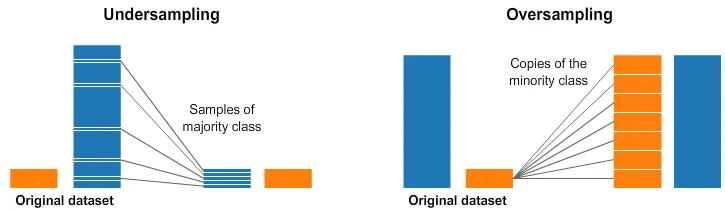

Undersamping our data

In [ ]:
undersampler = RandomUnderSampler(random_state=42)

# Undersampling the training set
standardized_train_X_undersample, train_y_undersample = undersampler.fit_resample(standardized_train_X, train_y)


print('standardized_train_X_undersample.shape',standardized_train_X_undersample.shape)
pd.value_counts(train_y_undersample.loan_condition_int).to_frame()

until now (undersampling), we have：


| train vs test | X | y |
| --- | --- | --- |
| train | standardized_train_X_undersample | train_y_undersample |
| test | standardized_test_X | test_y |

Or you can use SMOTE. After testing, the effect is similar to the model after Undersampling.

In [ ]:
# smote = SMOTE(random_state=42)

# # oversampling the training set
# train_X_SMOTE, train_y_SMOTE = smote.fit_resample(standardized_train_X, train_y)

<a name="Feature-Selection"></a>
# Feature Selection


*   Filter
*   Wrapper



In [ ]:
selector = VarianceThreshold(threshold=1)
selector.fit(standardized_train_X_undersample)

filtered_feature_names = standardized_train_X_undersample.columns[selector.get_support()]
standardized_train_X_undersample_filtered = standardized_train_X_undersample[filtered_feature_names]

standardized_train_X_undersample_filtered.shape

In [ ]:
#modify this if you want to use SMOTE
to_wrap_train_X = standardized_train_X_undersample_filtered.copy()
train_y = train_y_undersample.copy()

In [ ]:
nfeatures = len(to_wrap_train_X.columns)
nfeatures

Stepwise selection wrapper will take a lot of time, so you can skip it directly and use the results I got after running it, as follows:

In [ ]:
vars_final = ['delinq_2yrs',
 'last_fico_range_high',
 'last_fico_range_low',
 'acc_now_delinq',
 'open_acc_6m',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'all_util']

Or if you have time you can run it yourself （Ctrl+/ Uncomment and run）

In [ ]:
# %%time
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

# nfeatures = len(to_wrap_train_X.columns)
# clf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
# sfs = SFS(clf, k_features=nfeatures, forward=True, verbose=2, cv=2, n_jobs=-1)
# sfs.fit(to_wrap_train_X, train_y)

# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
# vars_FS

In [ ]:
# vars_final = list(vars_FS.loc[15, 'feature_names'])
# vars_final

In [ ]:
# fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev', figsize=(8, 5))
# plt.xticks(np.arange(0, len(to_wrap_train_X.columns), step=5))

# # plt.ylim([0.9, 1.0])
# plt.xlim(0,len(to_wrap_train_X.columns))
# plt.title('Stepwise Selection')
# plt.grid()
# plt.show()

In [ ]:
# Use wrapper to reduce variables
wrapped_train_X = to_wrap_train_X.filter(vars_final, axis=1)
wrapped_test_X = standardized_test_X.filter(vars_final, axis=1)


print("final train/test X shape (target encoded):", wrapped_train_X.shape, wrapped_test_X.shape)
print("final train/test y shape:", train_y.shape, test_y.shape)

In [ ]:
wrapped_train_X.head()

until now, we have：


| train vs test | X | y |
| --- | --- | --- |
| train | wrapped_train_X | train_y |
| test | wrapped_test_X | test_y |

<a name="Model-Building"></a>
# Model Building

Models:


*   Logistic Regression
*   Decision Tree
*   K Nearest Neighbors
*   Random Forest
*   Gaussian Naive Bayes
*   Light GBM
*   XGBoost
*   Gradient Boosting
*   Neural Network

**5-fold Cross Validation**: The model was trained on the training set and 5-fold cross-validation was used to assess model accuracy during training.



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def plot_confusion_matrix(mean_conf_matrix, xtick_labels=None, ytick_labels=None):
    fig, axes = plt.subplots(figsize=(8, 6))
    default_style = sns.axes_style()
    # sns.set(font_scale=1.5)
    ax = sns.heatmap(mean_conf_matrix.T, annot=True, cmap='Blues', fmt=".1f",annot_kws={"size": 18})
    if xtick_labels:
        ax.set_xticklabels(xtick_labels)
    if ytick_labels:
        ax.set_yticklabels(ytick_labels)


    ax.set_xlabel('True Label')
    ax.set_ylabel('Predicted Label')
    ax.axis('equal')
    plt.title('Mean Confusion Matrix')
    sns.set_style(default_style)
    plt.show()

def calculate_scores(model, X_trn, y_trn, X_tst, y_tst):
    """Calculate various classification scores on the test set"""
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_tst, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_tst, y_pred)
    recall = recall_score(y_tst, y_pred)
    f1 = f1_score(y_tst, y_pred)

    y_pred_proba = model.predict_proba(X_tst)[:,1]
    auc = roc_auc_score(y_tst, y_pred_proba)

    mask = y_tst['loan_condition_int'].astype(bool).values
    churn = y_pred_proba[mask]
    not_churn = y_pred_proba[~mask]
    ks = sps.ks_2samp(churn, not_churn)[0]

    return accuracy, auc, ks, conf_matrix, precision, recall, f1

def fit_first_level(models, X_trn, y_trn, X_tst):
    """
    Prepare first-level model fitting for stacking. Only used during model stacking.
    Output the predicted probabilities of the first-level models as features for the stacking model.
    """
    # Create dataframes to store predictions of the first-level models
    X2_trn = np.zeros((len(X_trn), 2 * len(models)))
    X2_tst = np.zeros((len(X_tst), 2 * len(models)))

    for i, model in enumerate(models.values()):
        print("Stacking with", model)

        model.fit(X_trn, y_trn)
        y_trn_pred_proba = model.predict_proba(X_trn)
        y_tst_pred_proba = model.predict_proba(X_tst)

        X2_trn[:, i*2:(i+1)*2] = y_trn_pred_proba
        X2_tst[:, i*2:(i+1)*2] = y_tst_pred_proba

    return X2_trn, X2_tst

def calculate_cv_scores(model, X, y, cv=5, stacking=False, models=None, verbose=False):
    """Calculate average k-fold cross-validated classification scores"""
    kf = KFold(n_splits=cv, shuffle=True)
    accuracy_scores = []
    auc_scores = []
    ks_scores = []
    conf_matrices = []  # Store confusion matrices for each fold
    precision_scores = []
    recall_scores = []
    f1_scores = []
    fold_count = 0

    for train_index, test_index in kf.split(X):
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]

        if stacking:
            # smote = False
            X_trn, X_tst = fit_first_level(models, X_trn, y_trn, X_tst)

        accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(model, X_trn, y_trn, X_tst, y_tst)
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        ks_scores.append(ks)
        conf_matrices.append(conf_matrix)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # if verbose:
        #     print(f"Fold {fold_count} accuracy, auc, ks:", accuracy, auc, ks)

        fold_count += 1

    # mean confusion matrix
    mean_conf_matrix = np.mean(conf_matrices, axis=0) #/ np.sum(np.mean(conf_matrices, axis=0)))
    print(f"Mean Confusion Matrix for Model:\n", mean_conf_matrix)
    plot_confusion_matrix(mean_conf_matrix, xtick_labels=['Good Loan', 'Bad Loan'], ytick_labels=['Good Loan', 'Bad Loan'])

    return np.mean(accuracy_scores), np.mean(auc_scores), np.mean(ks_scores), np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)

def fit_models_summary(models, X, y, cv=5, smote = False,undersample = False):
    """
    Calculate average k-fold cross-validated classification scores for multiple models.
    Generate a summary dataframe.
    """
    baseline = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

    for name, model in models.items():
        # accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv, smote=False)
        # baseline.loc[name] = [accuracy, auc, ks, None, precision, recall, f1]

        accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(model, X, y, cv=cv)

        if smote:
            baseline.loc["{} (SMOTE)".format(name)] = [accuracy, auc, ks, precision, recall, f1]
        if undersample:
            baseline.loc["{} (undersample)".format(name)] = [accuracy, auc, ks, precision, recall, f1]

        print(f"{name} processed")

    return baseline

In [ ]:
mss=60
msl=int(mss/2)

models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
     'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
     'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10)),
# #     'Support Vector Machine': SVC()
}

In [ ]:
# test baseline models on undersampling dataset
baseline_tgt = fit_models_summary(models, wrapped_train_X, train_y, undersample=True)

In [ ]:
baseline_tgt

<a name="Model-Stacking"></a>
# Model Bagging and Stacking

Bagging

In [ ]:
models = {
     'Logistic Regression': LogisticRegression(),
     'Decision Tree': DecisionTreeClassifier(max_depth=10,min_samples_split=mss,min_samples_leaf=msl),
    #  'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=20),
     'Random Forest': RandomForestClassifier(n_estimators=20,max_depth=10),
    #  'Gaussian Naive Bayes': GaussianNB(var_smoothing=1),
     'Light GBM': LGBMClassifier(n_estimators=50,max_depth=3),
     'XGBoost': XGBClassifier(n_estimators=50,max_depth=3),
     'Gradient Boosting': GradientBoostingClassifier(n_estimators=50,max_depth=3),
     "Neural Network": MLPClassifier(hidden_layer_sizes = (10,10))
}

In [ ]:
performance_df = pd.DataFrame(columns=['accuracy', 'auc', 'ks', 'precision', 'recall', 'f1'])

bagging_models = {}

for model_name, model in models.items():
    print("processing: ", model_name)
    bagging_model = BaggingClassifier(base_estimator=model, n_estimators=10, random_state=42)

    # Training Bagging model
    bagging_model.fit(wrapped_train_X, train_y)

    bagging_models[model_name + '_bagging'] = bagging_model
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(bagging_model, wrapped_train_X, train_y, wrapped_test_X, test_y)
    performance_dict = {
        'accuracy': accuracy,
        'auc': auc,
        'ks': ks,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    performance_df.loc[model_name + ' (bagging)'] = performance_dict

performance_df

Stacking

In [ ]:
%%time
stack_model = XGBClassifier(max_depth = 3)
accuracy, auc, ks, precision, recall, f1 = calculate_cv_scores(stack_model, wrapped_train_X, train_y,
                                        stacking = True, models = models,
                                        verbose = True)
print('Stacking baseline:')
print('Accuracy:', accuracy)
print('AUC:', auc)
print('recall:', recall)

<a name="Model-Evaluation"></a>
# Model Evaluation on Test Set
**Performance on test set:** models were evaluated on the held-out test set to obtain true test accuracy.

In [ ]:
holdout_summary = pd.DataFrame(columns = ['accuracy','auc','ks','precision','recall','f1'])

X_trn, y_trn = wrapped_train_X, train_y

for name, model in models.items():
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(model, X_trn, y_trn, wrapped_test_X, test_y)
    holdout_summary.loc[name] = [accuracy, auc, ks, precision, recall, f1]

X2_trn, X2_tst = fit_first_level(models, wrapped_train_X, train_y, wrapped_test_X)


# add bagging model performance
for model_name, bagging_model in bagging_models.items():
    accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(bagging_model, wrapped_train_X, train_y, wrapped_test_X, test_y)
    holdout_summary.loc[model_name] = [accuracy, auc, ks, precision, recall, f1]


# add stack model performance
stack_model = XGBClassifier()
accuracy, auc, ks, conf_matrix, precision, recall, f1 = calculate_scores(stack_model, X2_trn, train_y, X2_tst, test_y)
holdout_summary.loc['Stacking Model (XGB)'] = [accuracy, auc, ks, precision, recall, f1]

In [ ]:
holdout_summary

**Conclusion**
- The performance scores on the hold-out set are nearly the same with the cross-validated scores on the training set. This is a good sign that the models don't overfit.
- The performance of the models are very close to each other. For computation and interpretability concerns, the Logistic Regression/ Decision Tree/ Random Forest model with undersampling method is recommended.